# Hyperparameter Tuning Lab

### Lesson Objectives:
- Understand the difference between parameters and hyperparameters
- Understand why we tune hyperparameters
- Understand how hyperparameter tuning impacts the outcomes of your model
- Apply hyperparameter tuning to your model using gridsearch and randomsearch
- Select the "best" hyperparameters for your model

## Parameters vs Hyperparameters

We talk a lot about parameters and hyperparameters, but what are they?  What is the difference?

![](images/meetupconsumercreditdefaultvers2all-11-638.jpg)

<font size="5"><span style="color:red"> Why do we tune hyperparameters?</span></font>

We tune hyperparameters to find the set of hyperparameters that optimize the predictive ability (ex. accuracy, recall, r-squared value, RMSE, etc.)

A big factor in whether a machine learning model will perform well is a lot of tweaking...

![Pile of data to stir (https://xkcd.com/1838/)](images/machine_learning_xkcd.png)

You can think of hyperparameters as little dials to adjust to make it easier for the machine learning model to learn

![](images/dials.png)

But how do we know what to adjust them to?!

## How does this fit into the CRISP-DM Model?

Let's remind ourselves about the steps of the CRISP-DM Model.

![](./images/new_crisp-dm.png)

## First let's talk data!

The [data](https://www.kaggle.com/jolasa/bay-area-bike-sharing-trips) we will be using today is taken from Kaggle. This dataset contains anonymized trips data of Lyft bike sharing system(Bay Wheels), in the Bay Area from January 2019 to May 2019.


We are going to use this data to create a model the predicts if the the member is a "brogrammer".  Everyone who is a male and lives in SF AND rides an electric bike is a Brogrammer.  This target has already been created for you.

![bikes](images/bikes.jpg) 
![the wiggle](images/wiggle.png)

### Let's read in the data and do some EDA


In [1]:
import pandas as pd
import matplotlib as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.dummy import DummyClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler


from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report


from sklearn.preprocessing import LabelEncoder

from yellowbrick.classifier import ROCAUC
from yellowbrick.classifier import ConfusionMatrix
from yellowbrick.classifier import ClassificationReport

/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


In [2]:
bike=pd.read_pickle('./data/bike.pkl')
bike.head()

,trip_duration_sec,start_station_id,end_station_id,bike_id,member_birth_year,trip_duration_min,bg,month_April,month_Februrary,month_January,month_March,month_May,user_type_Customer,user_type_Subscriber
4,1128,124.0,5.0,877,1973.0,18.80,Brogrammer,1,0,0,0,0,0,1
5,1388,243.0,247.0,3234,1997.0,23.13,Brogrammer,1,0,0,0,0,1,0
6,920,202.0,220.0,3262,1976.0,15.33,Brogrammer,1,0,0,0,0,0,1
7,725,44.0,121.0,2706,1973.0,12.08,Brogrammer,1,0,0,0,0,1,0
8,488,21.0,64.0,860,1986.0,8.13,Brogrammer,1,0,0,0,0,0,1


In [3]:
bike.bg.value_counts()

Brogrammer     706660
Nice_person    240182
Name: bg, dtype: int64

In [4]:
bike.describe()

,trip_duration_sec,start_station_id,end_station_id,bike_id,member_birth_year,trip_duration_min,month_April,month_Februrary,month_January,month_March,month_May,user_type_Customer,user_type_Subscriber
count,946842.000000,946842.000000,946842.000000,946842.000000,946842.000000,946842.000000,946842.000000,946842.000000,946842.000000,946842.000000,946842.000000,946842.000000,946842.000000
mean,578.960272,138.468291,135.722913,3891.877124,1984.673319,9.649340,0.226212,0.176227,0.182460,0.241813,0.173288,0.098418,0.901582
std,324.429294,112.670023,111.868923,1972.289709,10.045458,5.407152,0.418378,0.381013,0.386224,0.428182,0.378496,0.297879,0.297879
min,61.000000,3.000000,3.000000,11.000000,1878.000000,1.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,327.000000,47.000000,44.000000,2175.000000,1980.000000,5.450000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,512.000000,101.000000,98.000000,4560.000000,1987.000000,8.530000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,769.000000,238.000000,223.000000,5433.000000,1992.000000,12.820000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1583.000000,427.000000,427.000000,7196.000000,2001.000000,26.380000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


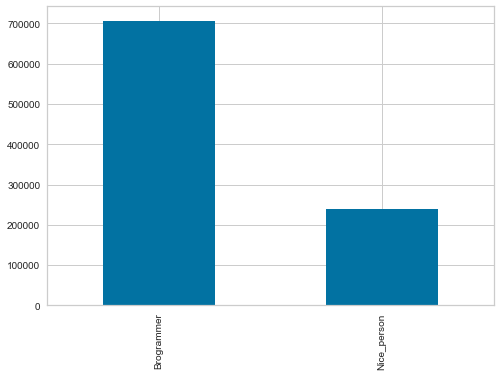

In [5]:
bike.bg.value_counts().plot(kind='bar')

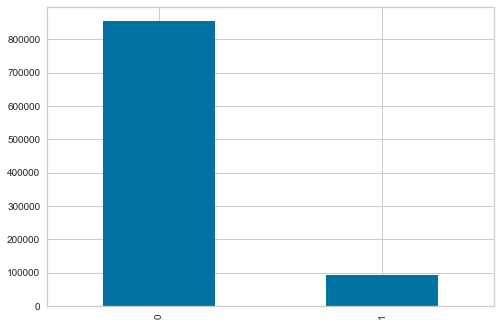

In [6]:
bike.user_type_Customer.value_counts().plot(kind='bar')

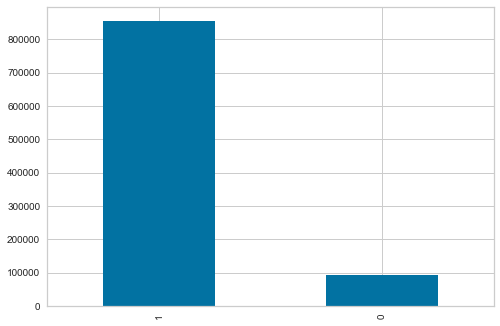

In [7]:
bike.user_type_Subscriber.value_counts().plot(kind='bar')

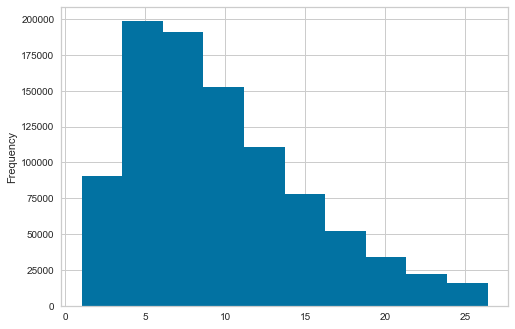

In [8]:
bike.trip_duration_min.plot(kind='hist')

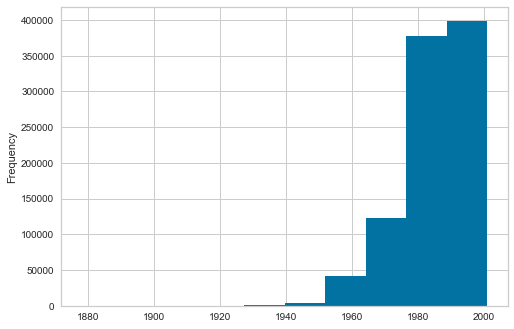

In [9]:
bike.member_birth_year.plot(kind='hist')

<font size="5"><span style="color:red"> What other visualizations could/should we create?</span></font>

## Start with a Baseline/Dummy Model

First we are going to start with a dummy model to predict if the user was a brogrammer.  In our dummy model we classify everything as the majority class.  
https://scikit-learn.org/stable/modules/generated/sklearn.dummy.DummyClassifier.html

In [10]:
#set random state for our notebook
import numpy as np
np.random.seed(107)

#set brogrammer as the target and use all other features as 
y = bike['bg']
#set features to all variables except brogrammer and trip in seconds
X = bike.drop(['bg', 'trip_duration_sec'], axis=1)

In [11]:
#split our data into test and train
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=.3 )

In [12]:
#check out the shape of our data
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(662789, 12)
(662789,)
(284053, 12)
(284053,)


In [13]:
# DummyClassifier to predict only target 0
dummy = DummyClassifier(strategy='most_frequent').fit(X_train, y_train)
dummy.fit(X_train, y_train)
dummy.score(X_train, y_train)

0.7463340520135368

<font size="5"><span style="color:red"> What does the "score" from the dummy classifier tell us about the predictive quality of our model?</span></font>

The score from the classifier tells us that 75% of our test data was correctly classified.

#### Now  let's create a nice looking confusion matrix using the yellowbrick package
[yellowbrick documentation](https://www.scikit-yb.org/en/latest/api/classifier/confusion_matrix.html)

/anaconda3/lib/python3.7/site-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/yellowbrick/classifier/base.py:232: YellowbrickWarning: could not determine class_counts_ from previously fitted classifier
  YellowbrickWarning,


0.7463340520135368

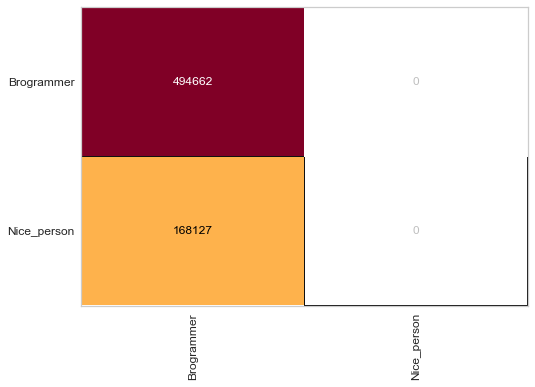

In [14]:
cm = ConfusionMatrix(dummy)

# To create the ConfusionMatrix, we need some test data. Score runs predict() on the data
# and then creates the confusion_matrix from scikit-learn.
cm.score(X_train, y_train)


<font size="5"><span style="color:red"> What does this confusion matrix tell us about what the dummy classifier did?</span></font>

The dummy classifier classified all test data as brogrammer.  

## Your Turn: Fitting a Vanilla Model

Now that we know what our dummy/baseline classifier does we are going to fit a vanilla decision tree model to predict if the user was a brogrammer.

Do the following in your group then answer the questions:

1. Create a vanilla decision tree model and fit it to your training data
2. Print the accuracy score of this prediction
3. Print a confusion matrix for your training data
4. Print a classification report for the model

**BONUS**:  Repeat the above steps using a Naive Bayes classifier. Compare and contrast the two models.

In [15]:
# your code here

In [16]:
#__SOLUTION__
clf_DT = DecisionTreeClassifier()
clf_DT.fit(X_train, y_train)
clf_DT.score(X_train, y_train)

0.9999984912242056

/anaconda3/lib/python3.7/site-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/yellowbrick/classifier/base.py:232: YellowbrickWarning: could not determine class_counts_ from previously fitted classifier
  YellowbrickWarning,


0.9999984912242056

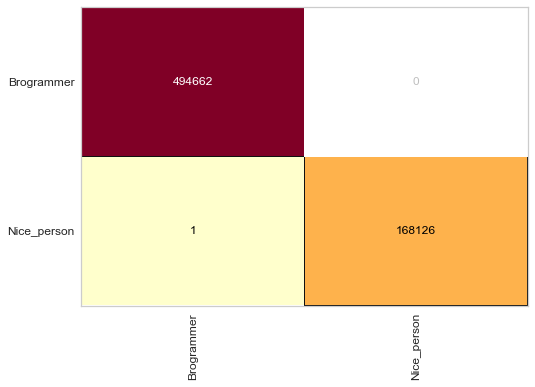

In [17]:
#__SOLUTION__

cm = ConfusionMatrix(clf_DT)

# To create the ConfusionMatrix, we need some test data. Score runs predict() on the data
# and then creates the confusion_matrix from scikit-learn.
cm.score(X_train, y_train)

In [18]:
y_pred=clf_DT.predict(X_train)
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

  Brogrammer       1.00      1.00      1.00    494662
 Nice_person       1.00      1.00      1.00    168127

    accuracy                           1.00    662789
   macro avg       1.00      1.00      1.00    662789
weighted avg       1.00      1.00      1.00    662789



<font size="5"><span style="color:red"> 1. What does the "score" from the decision tree classifier tell us about the predictive quality of our model?</span></font>

**Your answer here**

The score from the classifier tells us that 99% of our training data was correctly classified.

<font size="5"><span style="color:red"> 2. According to confusion matrix, how well did our decision tree classifier do?</span></font>

**Your answer here**

Our model only wrongly classified one data point!  We are probably overfitting here.

<font size="5"><span style="color:red">3. According to classification report, how well did our decision tree classifier do?</span></font>

**Your answer here**

Same thing here.  We did a nearly perfect job at classifying our data.  Overfitting for sure!

## Now onto Grid Search: Find the best hyperparameters for us!

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html

A way for us to search over multiple hyperparameters for the given model to see if we can increase the accuracy of our model by "tuning" our hyperparameters in our decision tree model.

In [19]:
#first we set up a grid of hyperparameters we want to "search over"
param_grid = {
    'max_depth': [2, 5],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4],
    'min_samples_split': [8, 10],
}

#then we conduct the "search"
gs = GridSearchCV(estimator = clf_DT, param_grid = param_grid, 
                          cv = 5)
gs.fit(X_train, y_train)
#finally we find the best hyperparameters
gs.best_params_

{'max_depth': 5,
 'max_features': 3,
 'min_samples_leaf': 4,
 'min_samples_split': 8}

###  WOW that took a while!!  Is there an easier way than just waiting for this to run?

## Luckily there is!  Let's check out the RandomizedSearchCV feature in sklearn
https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html


In [20]:
#we can use the same exact param_grid we have already defined
param_grid = {
    'max_depth': [2, 5],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4],
    'min_samples_split': [8, 10],
}

#then we conduct the "search"
rs = RandomizedSearchCV(estimator = clf_DT,  param_distributions = param_grid, 
                          cv = 5)
rs.fit(X_train, y_train)
#finally we find the best hyperparameters
rs.best_params_

{'min_samples_split': 8,
 'min_samples_leaf': 3,
 'max_features': 2,
 'max_depth': 2}

### Great, that ran a bit faster.  But wait...why are our best params different now????

In contrast to GridSearchCV, not all parameter values are tried out, but rather a fixed number of parameter settings is sampled from the specified distributions. The number of parameter settings that are tried is given by n_iter.

## Fitting our Decision Tree Using Best Hyperparameters

In [21]:
#save our best model from the grid search
best_DT=gs.best_estimator_

#fit the data using the best model and look at the score given test data
best_DT.fit(X_train, y_train)
best_DT.score(X_train, y_train)

0.7463340520135368

<font size="5"><span style="color:red"> Our vanilla model had an accuracy score of 99%.  How did our tuned model do in comparison?</span></font>

Looks like our tuned model actually did worse than our vanilla model in overall accuracy. But it likely now isn't overfitting our data!

/anaconda3/lib/python3.7/site-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/yellowbrick/classifier/base.py:232: YellowbrickWarning: could not determine class_counts_ from previously fitted classifier
  YellowbrickWarning,


0.7463340520135368

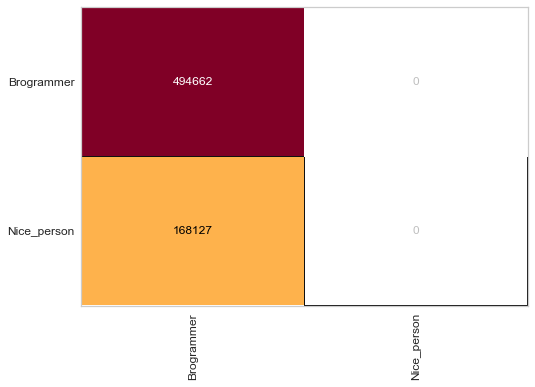

In [22]:
cm = ConfusionMatrix(best_DT)

# To create the ConfusionMatrix, we need some test data. Score runs predict() on the data
# and then creates the confusion_matrix from scikit-learn.
cm.score(X_train, y_train)


<font size="5"><span style="color:red"> According to confusion matrix, how well did our decision tree classifier do?</span></font>

Wow, this confusion matrix is the same as our dummy classifier! That's not what we want!

In [23]:
y_pred=best_DT.predict(X_train)
print(classification_report(y_train, y_pred))

/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

  Brogrammer       0.75      1.00      0.85    494662
 Nice_person       0.00      0.00      0.00    168127

    accuracy                           0.75    662789
   macro avg       0.37      0.50      0.43    662789
weighted avg       0.56      0.75      0.64    662789



<font size="5"><span style="color:red"> According to classification report, how well did our decision tree classifier do?</span></font>

Again, this confirms that we essentially went back to the dummy model where we classified everything as the majority class.

## Pipelines and hyperparameter searching!

Yes, let's go back to that concept of a pipeline.  We established using pipelines is important when we our transforming our data and using cross validation (which our gridsearch and randomized search are using).  

In [24]:
#set up our pipe, even though ss isn't necessary here let's add it 
#just to see how the pipe works
pipe = make_pipeline(StandardScaler(), DecisionTreeClassifier())


#we can use the same exact param_grid we have already defined
param_grid = {
    'decisiontreeclassifier__max_depth': [2, 5],
    'decisiontreeclassifier__max_features': [2, 3],
    'decisiontreeclassifier__min_samples_leaf': [3, 4],
    'decisiontreeclassifier__min_samples_split': [8, 10],
}

#now use our pipe in our grid search
gridsearch_pipe = GridSearchCV(pipe, 
                          param_grid = param_grid,
                          cv = 5)

gridsearch_pipe.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('standardscaler',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('decisiontreeclassifier',
                                        DecisionTreeClassifier(ccp_alpha=0.0,
                                                               class_weight=None,
                                                               criterion='gini',
                                                               max_depth=None,
                                                               max_features=None,
                                                               max_leaf_nodes=None,
                                                               min_impurity_decrease=0.0,
          

In [25]:
#save our best model from the grid search
best_pipe=gridsearch_pipe.best_estimator_

#fit the data using the best model and look at the score given test data
best_pipe.fit(X_train, y_train)
best_pipe.score(X_train, y_train)

0.7463476309956865

/anaconda3/lib/python3.7/site-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/yellowbrick/classifier/base.py:232: YellowbrickWarning: could not determine class_counts_ from previously fitted classifier
  YellowbrickWarning,


0.7463476309956865

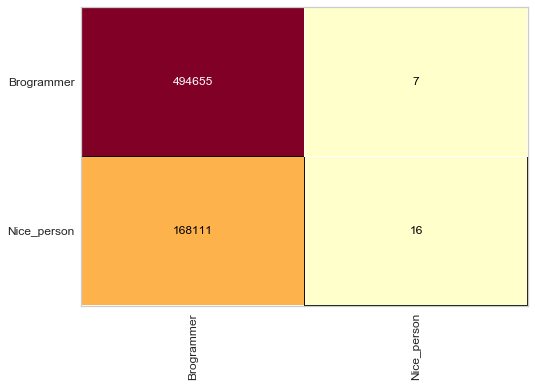

In [26]:
cm = ConfusionMatrix(best_pipe)

# To create the ConfusionMatrix, we need some test data. Score runs predict() on the data
# and then creates the confusion_matrix from scikit-learn.
cm.score(X_train, y_train)


<font size="5"><span style="color:red"> Does this mean that hyperparameter tuning isn't good?  What can we do now?</span></font>

We have lots of options to move forward and increase our classification.  We can:
- **try a different classification model**
- **tune other hyperparameters in our decision tree model**
- **try balancing our classes**
- add more data
- add new features- maybe we don't have ones that are very predictive

<font size="5"><span style="color:red"> Your Turn:  Now work in small groups to take one of the above next steps to increase the classification of brogrammers! </span></font>

**When you have selected your VERY BEST Model then use the test data to see how it did!**